# 감정사전 구축 KNU(Korean Sentiment Lexicon)

** 주요 특징:
- 한국어 전용: 한국어의 특성을 고려한 감성사전
- 품사별 분류: 명사, 동사, 형용사, 부사 등 품사별로 감성 단어 분류
- 긍정/부정 레이블: 각 단어에 긍정(1) 또는 부정(0) 레이블 부여
- 학술적 기반: 한국어 자연어처리 연구에서 널리 사용되는 표준 사전

## 1단계 : total_test_tokens.csv 생성 (평점)

In [39]:
# 1단계 : Ntoken_review.csv에서 total_test_tokens.csv 생성
import pandas as pd
from ast import literal_eval
import numpy as np

print("=== 1단계: total_test_tokens.csv 생성 ===")

# Ntoken_review.csv 로드
df = pd.read_csv('/Users/Shared/최종선_교수님/Face_skin_disease/데이터 전처리/Ntoken_review.csv', encoding='utf-8')
print(f"원본 데이터 크기: {df.shape}")



=== 1단계: total_test_tokens.csv 생성 ===
원본 데이터 크기: (1094, 11)


In [40]:
df.columns

Index(['product_name', 'reviewer_id', 'skin_type', 'skin_tone',
       'skin_concern_1', 'skin_concern_2', 'rating', 'review_date', 'review',
       'tokens', 'Ntoken_review'],
      dtype='object')

In [41]:
df.head()

,product_name,reviewer_id,skin_type,skin_tone,skin_concern_1,skin_concern_2,rating,review_date,review,tokens,Ntoken_review
0,닥터지 더모이스처 배리어D 인텐스 크림,리리578,건성,봄웜톤,모공,미백,5,2025.07.24,닥터지 더모이스처 배리어 인텐스크림 제가 이 제품을 사용하고 이렇게 오랜기간...,"[('닥터', 'NNP'), ('지', 'NNB'), ('더', 'MAG'), ('...","['닥터', '이스', '리어', '스크림', '제가', '제품', '사용', '기..."
1,닥터지 더모이스처 배리어D 인텐스 크림,김츄츄,건성,겨울쿨톤,각질,아토피,5,2025.07.27,악건성인데 화장하기 전에 무조건 바르는 크림입니다 화장 잘 뜨고 각질 많이 일어나...,"[('악건성', 'NNG'), ('이', 'VCP'), ('ㄴ데', 'EC'), (...","['악건성', '화장', '크림', '화장', '각질', '건성', '정말', '정..."
2,닥터지 더모이스처 배리어D 인텐스 크림,화사한웜코덕,NaN,NaN,NaN,NaN,5,2025.05.31,현직메컵아티스트입니다이거 안맞는 분 한번도 못봤어용 기초할때 선크림 직전에 발라주고...,"[('현직', 'NNG'), ('메', 'NNG'), ('컵', 'NNG'), ('...","['현직', '아티스트', '기초', '선크림', '직전', '흡수', '선크림',..."
3,닥터지 더모이스처 배리어D 인텐스 크림,앙정,건성,봄웜톤,모공,잡티,5,2025.06.22,보습 필요할때 사용하고 있어요가볍게 바르기 좋고 보습을 필요로할때는 듬뿍 발라주고 있어요,"[('보습', 'NNG'), ('필요', 'NNG'), ('하', 'XSV'), (...","['보습', '필요', '사용', '보습', '필요']"
4,닥터지 더모이스처 배리어D 인텐스 크림,mimilike,건성,웜톤,각질,주름,4,2025.07.11,다른 크림들과 비교해서 확실히 가려움에 효과가 있어요 그래서 저는 아토피 올라오는...,"[('다른', 'MM'), ('크림', 'NNG'), ('들', 'XSN'), ('...","['크림', '비교', '가려움', '효과', '아토피', '부분', '세라마이드'..."


### method1. 1~3=부정(0), 4~5=긍정(1)

In [42]:
# # 1단계 : Ntoken_review.csv에서 total_test_tokens.csv 생성 (라벨링 개선)
# import pandas as pd
# from ast import literal_eval
# import numpy as np

# print("=== 1단계: total_test_tokens.csv 생성 (라벨링 개선) ===")

# df = pd.read_csv('/Users/Shared/최종선_교수님/Face_skin_disease/데이터 전처리/Ntoken_review.csv', encoding='utf-8')

# # 평점 숫자화
# df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# # 1–3=부정(0), 4–5=긍정(1)
# df['pos_neg'] = df['rating'].apply(lambda r: 1.0 if r>=4 else 0.0)

# # tokens 파싱
# df['sen'] = df['tokens'].apply(literal_eval)
# test_data = df[['sen', 'pos_neg']].copy()

# # 클래스 불균형 완화: 각 클래스 최대 500개로 다운샘플
# pos = test_data[test_data['pos_neg']==1]
# neg = test_data[test_data['pos_neg']==0]
# n_pos = min(len(pos), 500)
# n_neg = min(len(neg), 500)

# if n_pos > 0 and n_neg > 0:
#     test_data = pd.concat([
#         pos.sample(n=n_pos, random_state=42), 
#         neg.sample(n=n_neg, random_state=42)
#     ], ignore_index=True)

# print(f"테스트 데이터 크기: {test_data.shape}")
# print(test_data['pos_neg'].value_counts())

# test_data.to_csv('total_test_tokens3.csv', index=False)
# print("✅ total_test_tokens3.csv 생성 완료!")

### method2. 3점을 중립으로 두고 1~2=부정, 4~5=긍정만 사용

In [43]:
# # 1단계 : Ntoken_review.csv에서 total_test_tokens.csv 생성 (라벨링 개선)
# import pandas as pd
# from ast import literal_eval
# import numpy as np

# print("=== 1단계: total_test_tokens.csv 생성 (라벨링 개선) ===")

# df = pd.read_csv('/Users/Shared/최종선_교수님/Face_skin_disease/데이터 전처리/Ntoken_review.csv', encoding='utf-8')

# # 평점 숫자화
# df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# # 1–2=부정(0), 4–5=긍정(1), 3점은 제외
# df = df[df['rating'].isin([1,2,4,5])].copy()
# df['pos_neg'] = df['rating'].apply(lambda r: 1.0 if r>=4 else 0.0)

# # tokens 파싱
# df['sen'] = df['tokens'].apply(literal_eval)
# test_data = df[['sen', 'pos_neg']].copy()

# # 클래스 불균형 완화: 각 클래스 최대 500개로 다운샘플
# pos = test_data[test_data['pos_neg']==1]
# neg = test_data[test_data['pos_neg']==0]
# n_pos = min(len(pos), 500)
# n_neg = min(len(neg), 500)

# if n_pos > 0 and n_neg > 0:
#     test_data = pd.concat([
#         pos.sample(n=n_pos, random_state=42), 
#         neg.sample(n=n_neg, random_state=42)
#     ], ignore_index=True)

# print(f"테스트 데이터 크기: {test_data.shape}")
# print(test_data['pos_neg'].value_counts())

# test_data.to_csv('total_test_tokens2.csv', index=False)
# print("✅ total_test_tokens2.csv 생성 완료!")

In [44]:
# 1단계: Ntoken_review.csv에서 total_test_tokens.csv 생성
import pandas as pd
from ast import literal_eval
import numpy as np

print("=== 1단계: total_test_tokens.csv 생성 ===")

# Ntoken_review.csv 로드
df = pd.read_csv('/Users/Shared/최종선_교수님/Face_skin_disease/데이터 전처리/Ntoken_review.csv', encoding='utf-8')

# 평점을 긍정/부정으로 변환 (4점 이상 = 긍정)
def convert_rating_to_sentiment(rating):
    if rating >= 4:
        return 1.0  # 긍정
    else:
        return 0.0  # 부정

df['pos_neg'] = df['rating'].apply(convert_rating_to_sentiment)

# tokens 컬럼을 파싱 (문자열 → 리스트 변환)
df['sen'] = df['tokens'].apply(literal_eval)

# 필요한 컬럼만 선택
test_data = df[['sen', 'pos_neg']].copy()

# ✅ 전체 데이터를 사용 (샘플링 없음)
print(f"테스트 데이터 크기: {test_data.shape}")
print(f"긍정 리뷰: {len(test_data[test_data['pos_neg']==1])}개")
print(f"부정 리뷰: {len(test_data[test_data['pos_neg']==0])}개")

# 파일 저장
test_data.to_csv('total_test_tokens.csv', index=False, encoding='utf-8-sig')
print("✅ total_test_tokens.csv 생성 완료!")

=== 1단계: total_test_tokens.csv 생성 ===
테스트 데이터 크기: (1094, 2)
긍정 리뷰: 1034개
부정 리뷰: 60개
✅ total_test_tokens.csv 생성 완료!


In [45]:
# 긍정/부정 리뷰 샘플 확인
print("=== 긍정 리뷰 샘플 ===")
positive_sample = test_data[test_data['pos_neg']==1].iloc[0]
print(f"긍정 리뷰 토큰: {positive_sample['sen']}")

print("\n=== 부정 리뷰 샘플 ===")
negative_sample = test_data[test_data['pos_neg']==0].iloc[0]
print(f"부정 리뷰 토큰: {negative_sample['sen']}")

# 원본 리뷰 텍스트도 확인하고 싶다면
print("\n=== 원본 리뷰 텍스트 샘플 ===")
positive_original = df[df['pos_neg']==1].iloc[10]
negative_original = df[df['pos_neg']==0].iloc[10]

print(f"긍정 리뷰 원본: {positive_original['review']}")
print(f"평점: {positive_original['rating']}")
print(f"\n부정 리뷰 원본: {negative_original['review']}")
print(f"평점: {negative_original['rating']}")

=== 긍정 리뷰 샘플 ===
긍정 리뷰 토큰: [('닥터', 'NNP'), ('지', 'NNB'), ('더', 'MAG'), ('모', 'MM'), ('이스', 'NNP'), ('처', 'NNG'), ('배', 'NNG'), ('리어', 'NNP'), ('인', 'NNG'), ('텐', 'NNG'), ('스크림', 'NNP'), ('제가', 'NNP'), ('이', 'MM'), ('제품', 'NNG'), ('을', 'JKO'), ('사용', 'NNG'), ('하', 'XSV'), ('고', 'EC'), ('이렇', 'VA'), ('게', 'EC'), ('오랜', 'MM'), ('기간', 'NNP'), ('사용', 'NNG'), ('하', 'XSV'), ('게', 'EC'), ('되', 'VV'), ('ㄹ', 'ETM'), ('줄', 'NNB'), ('은', 'JX'), ('모르', 'VV'), ('았', 'EP'), ('는데', 'EC'), ('년', 'NNB'), ('반', 'NNP'), ('동안', 'NNG'), ('이', 'MM'), ('제품', 'NNG'), ('을', 'JKO'), ('꾸준히', 'MAG'), ('사용', 'NNG'), ('하', 'XSV'), ('고', 'EC'), ('있', 'VV'), ('어요', 'EC'), ('밤', 'NNG'), ('기초', 'NNG'), ('마무리', 'NNG'), ('단계', 'NNG'), ('로', 'JKB'), ('수분크림', 'NNG'), ('용', 'XSN'), ('으로', 'JKB'), ('사용', 'NNG'), ('중', 'NNB'), ('이', 'VCP'), ('ㄴ데', 'EC'), ('사용', 'NNG'), ('하', 'XSV'), ('ㄹ', 'ETM'), ('때', 'NNG'), ('는', 'JX'), ('잘', 'MAG'), ('모르', 'VV'), ('겠', 'EP'), ('다', 'EC'), ('싶', 'VX'), ('어도', 'EC'), ('사용', 'NNG'), ('하', 'XS

## 2단계 : 긍정 감성사전 구축
#### Komoran

In [46]:
from konlpy.tag import Komoran
import warnings
warnings.filterwarnings('ignore')

# Komoran 초기화
komoran = Komoran()
tag_list = ['NNG', 'NNP', 'VV', 'VA', 'XR', 'MAG']

# 긍정사전 정제
print("긍정사전 정제 중...")
with open('pos_pol_word.txt', encoding='utf-8') as f:
    lines = f.read().splitlines()

pos_token = [komoran.pos(token) for token in lines]
pos_token_list = [[token[0] for token in tokens if token[1] in tag_list] for tokens in pos_token]
'''
token[0]: 실제단어 (예: '좋'), token[1]: 품사 태그(예: 'VA')
목적 : 지정된 품사(tag_list)에 해당하는 토큰만 추출
'''

# 빈 토큰 제거
pos_token_list = [tokens for tokens in pos_token_list if len(tokens) > 0]

# 중복 제거
pos_unique_dict = []
for t in pos_token_list:
    if t not in pos_unique_dict:
        pos_unique_dict.append(t)

print(f"긍정사전 토큰 수: {len(pos_unique_dict)}")

# 토큰 길이별 분류
pos_dict1, pos_dict2, pos_dict3 = [], [], []
for t in pos_unique_dict:
    if len(t) == 1:
        pos_dict1.append(t[0])
    elif len(t) == 2:
        pos_dict2.append(t)
    elif len(t) == 3:
        pos_dict3.append(t)

print(f"1-gram 긍정사전: {len(pos_dict1)}개")
print(f"2-gram 긍정사전: {len(pos_dict2)}개")
print(f"3-gram 긍정사전: {len(pos_dict3)}개")

긍정사전 정제 중...
긍정사전 토큰 수: 3195
1-gram 긍정사전: 967개
2-gram 긍정사전: 2137개
3-gram 긍정사전: 75개


## 3단계 : 부정사전 구축

In [47]:
# 부정사전 정제
print("부정사전 정제 중...")
with open('neg_pol_word.txt', encoding='utf-8') as f:
    lines = f.read().splitlines()

neg_token = [komoran.pos(token) for token in lines]
neg_token_list = [[token[0] for token in tokens if token[1] in tag_list] for tokens in neg_token]

# 빈 토큰 제거
neg_token_list = [tokens for tokens in neg_token_list if len(tokens) > 0]

# 중복 제거
neg_unique_dict = []
for t in neg_token_list:
    if t not in neg_unique_dict:
        neg_unique_dict.append(t)

print(f"부정사전 토큰 수: {len(neg_unique_dict)}")

# 토큰 길이별 분류
neg_dict1, neg_dict2, neg_dict3 = [], [], []
for t in neg_unique_dict:
    if len(t) == 1:
        neg_dict1.append(t[0])
    elif len(t) == 2:
        neg_dict2.append(t)
    elif len(t) == 3:
        neg_dict3.append(t)

# 추가 부정 단어들
neg_add = ['모르', '안', '아쉽', '별로', '그냥', '하', '따갑', '광고', '딱히', '나쁘', 
           '올라오', '기름', '부족', '못', '겉돌', '아직', '심하', '밀리', '열', '유분', 
           '뒤집', '떨어지', '불편', '비싸', '단점', '잘못', '어렵', '땡기', '싫']

for word in neg_add:
    neg_dict1.append(word)

print(f"1-gram 부정사전: {len(neg_dict1)}개")
print(f"2-gram 부정사전: {len(neg_dict2)}개")
print(f"3-gram 부정사전: {len(neg_dict3)}개")

부정사전 정제 중...
부정사전 토큰 수: 6052
1-gram 부정사전: 1921개
2-gram 부정사전: 3798개
3-gram 부정사전: 302개


In [48]:
test_data.head()

,sen,pos_neg
0,"[(닥터, NNP), (지, NNB), (더, MAG), (모, MM), (이스, ...",1.0
1,"[(악건성, NNG), (이, VCP), (ㄴ데, EC), (화장, NNG), (하...",1.0
2,"[(현직, NNG), (메, NNG), (컵, NNG), (아티스트, NNP), (...",1.0
3,"[(보습, NNG), (필요, NNG), (하, XSV), (ㄹ, ETM), (때,...",1.0
4,"[(다른, MM), (크림, NNG), (들, XSN), (과, JC), (비교, ...",1.0


In [49]:
# 'pos_neg' 컬럼의 값이 0인 행만 추출
df_negative = df[df['pos_neg'] == 0]

# 'pos_neg' 컬럼의 값이 1인 행만 추출
df_positive = df[df['pos_neg'] == 1]

## 4단계 : 성능 평가 (1-gram)

- 목적 : 테스트 데이터를 사용해 1-gram 기반 감성 분석 모델의 성능을 평가하고, 결과를 시각화한다.

- 주요 작업 :
1. 테스트 데이터 로드 및 전처리.
2. 1-gram 기반으로 감성 점수 계산
3. 예측 결과(긍정/부정)생성.
4. 모델 성능 평가(정확도, 분류 보고서, 혼동 행렬 시각화)

=== 4단계: 성능 평가 (1-gram만) ===
긍정 예측: 566개
부정 예측: 528개

=== 1-gram 성능 결과 ===
정확도: 0.5375

분류 보고서:
              precision    recall  f1-score   support

         0.0       0.08      0.68      0.14        60
         1.0       0.97      0.53      0.68      1034

    accuracy                           0.54      1094
   macro avg       0.52      0.61      0.41      1094
weighted avg       0.92      0.54      0.65      1094



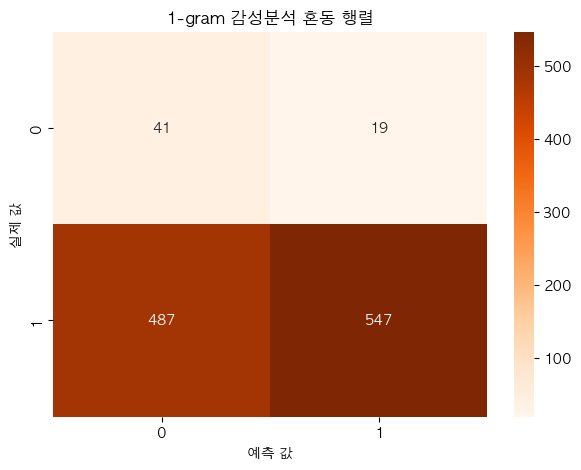

In [50]:
# 4단계: 성능 평가 (1-gram만)
print("=== 4단계: 성능 평가 (1-gram만) ===")

# 테스트 데이터 로드
test_sent = pd.read_csv('total_test_tokens.csv')
test_sent['sen'] = test_sent['sen'].apply(literal_eval)

# 형태소 분석 및 필터링
test_token_list = [[token[0] for token in tokens if token[1] in tag_list] for tokens in test_sent['sen']]
test_sent['sen2'] = test_token_list

# 감성 점수 계산 (1-gram만)
test_sent['senti_score'] = 0
test_sent['pred'] = 0

for i in range(len(test_sent)):
    for word in test_sent.loc[i, 'sen2']:
        if word in pos_dict1:
            test_sent.loc[i, 'senti_score'] += 1 # 긍정 단어 사전에 있으면 +1 증가
        elif word in neg_dict1:
            test_sent.loc[i, 'senti_score'] -= 1 # 부정 단어 사전에 있으면 -1 감소

# 예측 결과 생성
for i in range(len(test_sent)):
    if test_sent.loc[i, 'senti_score'] > 0:
        test_sent.loc[i, 'pred'] = 1

print(f"긍정 예측: {len(test_sent[test_sent['pred']==1])}개") 
print(f"부정 예측: {len(test_sent[test_sent['pred']==0])}개")

# 성능 평가
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

y_true = test_sent['pos_neg'].values.tolist()
y_pred = test_sent['pred'].values.tolist()

print("\n=== 1-gram 성능 결과 ===")
print(f"정확도: {accuracy_score(y_true, y_pred):.4f}")
print("\n분류 보고서:")
print(classification_report(y_true, y_pred))

# 혼동 행렬 시각화
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(7, 5))
plt.rcParams['font.family'] = 'AppleGothic'
sns.heatmap(cm, annot=True, cmap='Oranges', fmt='g')
plt.title('1-gram 감성분석 혼동 행렬')
plt.ylabel('실제 값')
plt.xlabel('예측 값')
plt.show()

## 5단계: 성능 평가 (1-gram + 2-gram + 3-gram)

=== 5단계: 성능 평가 (1-gram + 2-gram + 3-gram) ===
긍정 예측: 569개
부정 예측: 525개

=== 1-gram + 2-gram + 3-gram 성능 결과 ===
정확도: 0.5439

분류 보고서:
              precision    recall  f1-score   support

         0.0       0.08      0.72      0.15        60
         1.0       0.97      0.53      0.69      1034

    accuracy                           0.54      1094
   macro avg       0.53      0.63      0.42      1094
weighted avg       0.92      0.54      0.66      1094



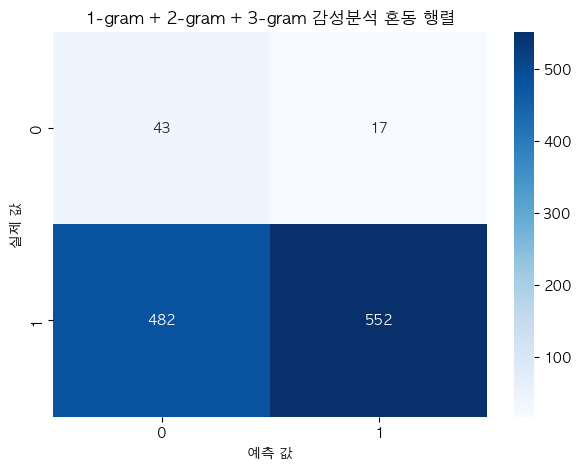

✅ 결과가 senti_labeled_df.csv에 저장되었습니다!


In [51]:
# 5단계: 성능 평가 (1-gram + 2-gram + 3-gram)
print("=== 5단계: 성능 평가 (1-gram + 2-gram + 3-gram) ===")

# 감성 점수 초기화
test_sent['senti_score'] = 0
test_sent['pred'] = 0

# 3-gram 처리
for i in range(len(test_sent)):
    for j in range(len(test_sent.loc[i, 'sen2'])-2):
        trigram = [test_sent.loc[i, 'sen2'][j], test_sent.loc[i, 'sen2'][j+1], test_sent.loc[i, 'sen2'][j+2]]
        if trigram in pos_dict3:
            test_sent.loc[i, 'senti_score'] += 1
        elif trigram in neg_dict3:
            test_sent.loc[i, 'senti_score'] -= 1

# 2-gram 처리
for i in range(len(test_sent)):
    for j in range(len(test_sent.loc[i, 'sen2'])-1):
        bigram = [test_sent.loc[i, 'sen2'][j], test_sent.loc[i, 'sen2'][j+1]]
        if bigram in pos_dict2:
            test_sent.loc[i, 'senti_score'] += 1
            test_sent.loc[i, 'sen2'][j] = ''
            test_sent.loc[i, 'sen2'][j+1] = ''
        elif bigram in neg_dict2:
            test_sent.loc[i, 'senti_score'] -= 1
            test_sent.loc[i, 'sen2'][j] = ''
            test_sent.loc[i, 'sen2'][j+1] = ''

# 1-gram 처리
for i in range(len(test_sent)):
    for word in test_sent.loc[i, 'sen2']:
        if word in pos_dict1:
            test_sent.loc[i, 'senti_score'] += 1
        elif word in neg_dict1:
            test_sent.loc[i, 'senti_score'] -= 1

# 예측 결과 생성
for i in range(len(test_sent)):
    if test_sent.loc[i, 'senti_score'] > 0:
        test_sent.loc[i, 'pred'] = 1

print(f"긍정 예측: {len(test_sent[test_sent['pred']==1])}개")
print(f"부정 예측: {len(test_sent[test_sent['pred']==0])}개")

# 성능 평가
y_true = test_sent['pos_neg'].values.tolist()
y_pred = test_sent['pred'].values.tolist()

print("\n=== 1-gram + 2-gram + 3-gram 성능 결과 ===")
print(f"정확도: {accuracy_score(y_true, y_pred):.4f}")
print("\n분류 보고서:")
print(classification_report(y_true, y_pred))

# 혼동 행렬 시각화
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(7, 5))
plt.rcParams['font.family'] = 'AppleGothic'
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('1-gram + 2-gram + 3-gram 감성분석 혼동 행렬')
plt.ylabel('실제 값')
plt.xlabel('예측 값')
plt.show()

# 결과 저장
test_sent.to_csv('senti_labeled_df.csv', index=False, columns=['sen','pos_neg','sen2','senti_score','pred'])
print("✅ 결과가 senti_labeled_df.csv에 저장되었습니다!")

In [52]:
test_sent

,sen,pos_neg,sen2,senti_score,pred
0,"[(닥터, NNP), (지, NNB), (더, MAG), (모, MM), (이스, ...",1.0,"[닥터, 더, 이스, 처, 배, 리어, 인, 텐, 스크림, 제가, 제품, 사용, 이...",0,0
1,"[(악건성, NNG), (이, VCP), (ㄴ데, EC), (화장, NNG), (하...",1.0,"[악건성, 화장, 전, 무조건, 바르, 크림, 화장, 잘, 뜨, 각질, 많이, 일어...",0,0
2,"[(현직, NNG), (메, NNG), (컵, NNG), (아티스트, NNP), (...",1.0,"[현직, 메, 컵, 아티스트, 안, 맞, 못, 보, 기초, 때, 선크림, 직전, 바...",-6,0
3,"[(보습, NNG), (필요, NNG), (하, XSV), (ㄹ, ETM), (때,...",1.0,"[보습, 필요, 때, 사용, 있, 가볍, 바르, 좋, 보습, 필요, 하, 때, 듬뿍...",5,1
4,"[(다른, MM), (크림, NNG), (들, XSN), (과, JC), (비교, ...",1.0,"[크림, 비교, 확실히, 가려움, 효과, 있, 아토피, 올라오, 부분, 바르, 세라...",-8,0
...,...,...,...,...,...
1089,"[(가격, NNG), (신상티켓팅, NA), (라이브, NNP), (에서, JKB)...",1.0,"[가격, 라이브, 신청, 받, 기준, 가격, 세일, 중인, 가격, 장점, 속건조, ...",5,1
1090,"[(신상티켓팅, NA), (체험단, NNG), (민감성, NNG), (수부지, NN...",1.0,"[체험단, 민감성, 수부지, 봄, 밝, 아토, 베리, 어, 입, 소문, 물론, 엄청...",-1,0
1091,"[(기존, NNG), (세대, NNG), (제품, NNG), (을, JKO), (사...",1.0,"[기존, 세대, 제품, 사용, 하, 피부, 안, 맞, 캡슐, 알갱이, 자극, 되, ...",-4,0
1092,"[(로션, NNP), (이나, JC), (크림, NNP), (은, JX), (기능,...",1.0,"[로션, 크림, 기능, 보습, 충실, 제품, 좋아하, 그러, 피, 일리, 윤, 제로...",-5,0
